<a href="https://colab.research.google.com/github/jusscarrascosa/ImageProcessing-and-Clustering-Projects/blob/main/Image_Segmentation_and_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Segmentation and Thresholding**

This notebook focuses on image segmentation techniques applied to a real-world example: flower detection in a natural background. The workflow starts with loading and visualizing the RGB image, then converting it to grayscale to analyze its intensity distribution using histograms. Based on the histogram analysis, global and adaptive thresholding methods are applied to segment the object of interest (the flowers) from the background.
The project demonstrates the process of manual and automatic threshold selection, showing how histogram characteristics influence the segmentation quality. Additionally, local (adaptive) binarization is performed to handle varying illumination conditions.
This type of segmentation approach is commonly used in computer vision applications such as object detection, pattern recognition, medical imaging preprocessing, and feature extraction.


---


*Este notebook se centra en técnicas de segmentación de imágenes aplicadas a un caso real: la detección de flores en un fondo natural. El flujo de trabajo comienza con la carga y visualización de la imagen RGB, para luego convertirla a escala de grises y analizar la distribución de intensidades mediante histogramas.*
*A partir de este análisis, se aplican métodos de umbralización global y adaptativa para segmentar el objeto de interés (las flores) del fondo. El proyecto demuestra el proceso de selección de umbral manual y automático, mostrando cómo las características del histograma influyen en la calidad de la segmentación. Además, se realiza una binarización local (adaptativa) para tratar condiciones variables de iluminación.*
*Este enfoque de segmentación es ampliamente utilizado en aplicaciones de visión por computadora como detección de objetos, reconocimiento de patrones, preprocesamiento de imágenes médicas y extracción de características. *

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

dimensiones (240, 200, 3)


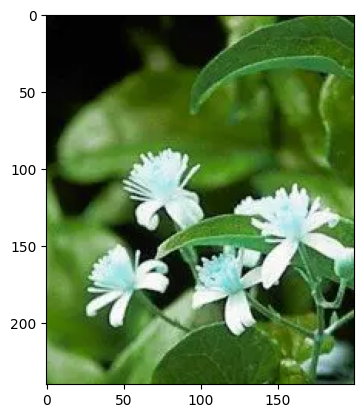

In [ ]:
img= cv2.imread('flores.png')
print('dimensiones', img.shape)
plt.imshow(img)
plt.show()

<ipython-input-10-c9d129932285>:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[1].hist(img[:,:].ravel(), 256,[0,256] )


(array([  35.,   76., 1616.,  419.,  238.,  576.,  732.,  591.,  289.,
         242.,  250.,  324.,  187.,  187.,  183.,  155.,  152.,  159.,
         145.,  103.,   93.,   96.,   66.,  105.,  110.,  135.,  217.,
         174.,  149.,  121.,  124.,  121.,  105.,   78.,   62.,   69.,
          85.,  101.,  131.,   88.,  101.,   86.,  102.,   94.,  115.,
         138.,  189.,  257.,  168.,  166.,  246.,  272.,  366.,  467.,
         365.,  383.,  352.,  372.,  435.,  548.,  594.,  508.,  446.,
         464.,  516.,  542.,  561.,  685.,  577.,  396.,  395.,  417.,
         416.,  437.,  488.,  422.,  405.,  347.,  387.,  399.,  409.,
         432.,  449.,  316.,  306.,  281.,  335.,  320.,  382.,  367.,
         327.,  255.,  293.,  364.,  336.,  359.,  338.,  265.,  251.,
         255.,  297.,  349.,  314.,  316.,  228.,  226.,  220.,  214.,
         243.,  260.,  250.,  220.,  197.,  172.,  170.,  231.,  232.,
         226.,  234.,  188.,  167.,  222.,  208.,  229.,  237.,  163.,
      

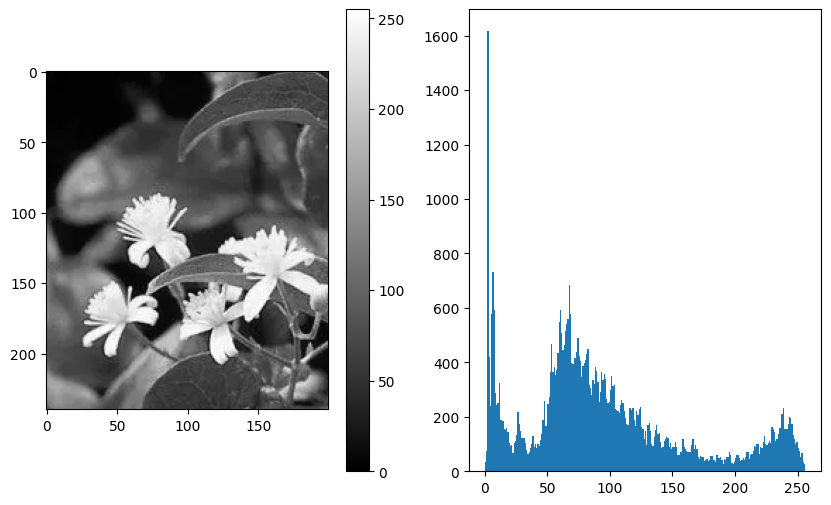

In [ ]:
img= cv2.imread('flores.png',0)
fig, axs = plt.subplots(1, 2, sharex=False)
axs=axs.ravel()
fig.set_figheight(6)
fig.set_figwidth(10)
im = axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
fig.colorbar(im, ax=axs[0])
axs[1].hist(img[:,:].ravel(), 256,[0,256] )

175
129.0


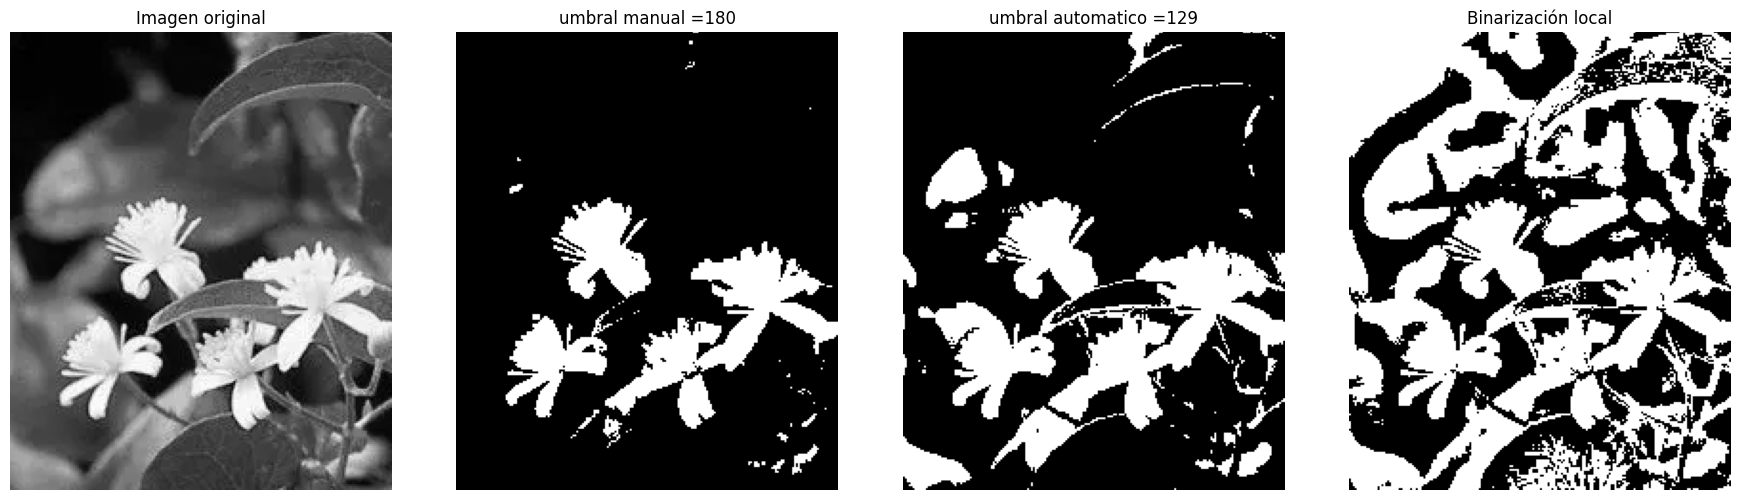

In [ ]:

umbral_manual = 175
ret, binaria= cv2.threshold(img, umbral_manual, 255, cv2.THRESH_BINARY)
ret1, binaria1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binaria2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 5)
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
axs = axs.ravel()

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Imagen original')
axs[0].axis('off')

axs[1].imshow(binaria, cmap='gray')
axs[1].set_title('umbral manual =180', print(umbral_manual))
axs[1].axis('off')

axs[2].imshow(binaria1, cmap='gray')
axs[2].set_title('umbral automatico =129', print(ret1))
axs[2].axis('off')

axs[3].imshow(binaria2, cmap='gray')
axs[3].set_title('Binarización local')
axs[3].axis('off')

plt.tight_layout()
plt.show()


The histogram analysis reveals distinct intensity ranges corresponding to background, foliage, and flowers. Dark pixels dominate the image, representing the background, while high-intensity values correspond to the flowers.

Manual thresholding (175) proved more effective at isolating flowers compared to Otsu’s automatic method (129), which misclassified parts of the leaves as the object of interest.

Adaptive thresholding performed well under non-uniform lighting, highlighting its importance for real-world scenarios.

The combination of histogram interpretation and threshold adjustment allowed for accurate segmentation of relevant features.


---

*El análisis del histograma revela rangos de intensidad diferenciados correspondientes al fondo, las hojas y las flores. Los píxeles oscuros dominan la imagen, representando el fondo, mientras que los valores de alta intensidad corresponden a las flores.*

*La umbralización manual (175) fue más eficaz para aislar las flores en comparación con el método automático de Otsu (129), que clasificó erróneamente partes de las hojas como objeto de interés.*

*La umbralización adaptativa funcionó bien en condiciones de iluminación no uniforme, destacando su relevancia en escenarios reales.*

*La combinación de la interpretación del histograma y el ajuste del umbral permitió segmentar con precisión las características relevantes.*



#Final Notes
This notebook demonstrates how combining intensity distribution analysis with thresholding techniques can effectively segment regions of interest in an image. Understanding histogram behavior is crucial to selecting appropriate threshold values and improving segmentation performance.


---
#*Conclusiones*

*Este notebook demuestra cómo la combinación del análisis de distribución de intensidades con técnicas de umbralización permite segmentar eficazmente regiones de interés en una imagen. Comprender el comportamiento del histograma es fundamental para seleccionar valores de umbral adecuados y mejorar el rendimiento de la segmentación.*